### 0. EDA och filhantering (*)
  a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder, glöm inte att lägga till den till .gitignore

b) Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

In [98]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from random import sample
import os
import numpy as np
import shutil
import random 
from PIL import Image

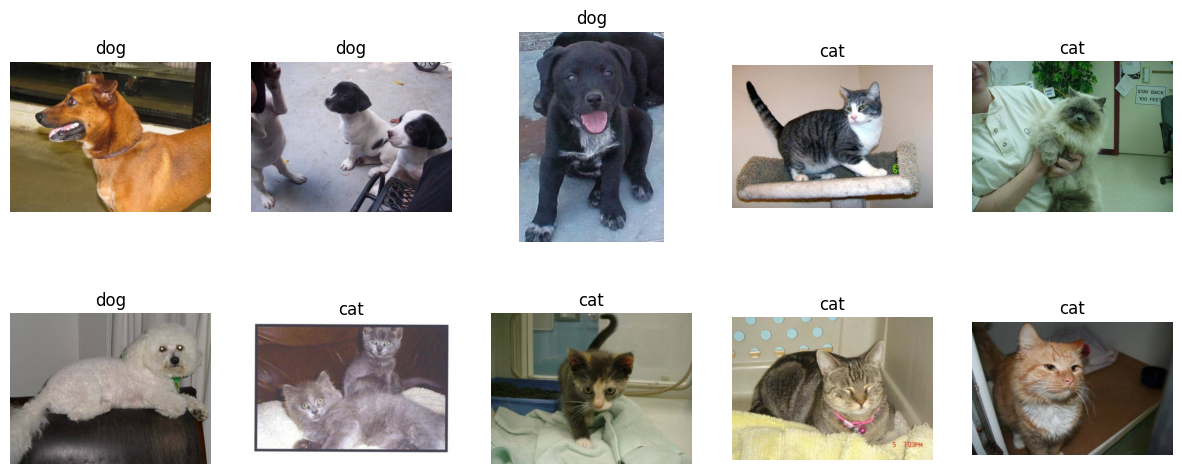

In [67]:
image_folder_path = "original_data/train"

# Create list with all images
all_images = [os.path.join(image_folder_path, f) for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f))]

# Pick 10 random pictures from the list
random_images = sample(all_images, 10)

def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def plot_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(label)
        ax.axis('off')
    plt.show()

# Load images
images = [load_image(image_path) for image_path in random_images]
labels = [os.path.basename(image_path).split('.')[0] for image_path in random_images]

plot_images(images, labels)

c) Skapa folderstrukturen nedan med Python:

In [8]:
paths = [
    'experiment_small_data/test',
    'experiment_small_data/train',
    'experiment_small_data/val',
    'experiment_tiny_data/test',
    'experiment_tiny_data/train',
    'experiment_tiny_data/val',
    'original_data'
]

# Create folders
for path in paths:
    Path(path).mkdir(parents=True, exist_ok=True)

d) Nu ska du göra train|val|test split med följande splits:
- train - 1600 (800 dogs, 800 cats)
- val - 400 (200 dogs, 200 cats)
- test - 500 (250 dogs, 250 cats)

In [72]:
original_data = 'original_data/train'  
experiment_small_data = 'experiment_small_data' 

In [73]:
def copy_files(files, subdir):
    for file in files:
        # Copy files from 'source_dir' to 'target_dir'
        shutil.copy(file, os.path.join(experiment_small_data, subdir, os.path.basename(file)))

# Read files and shuffle
dog_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('dog')]
cat_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('cat')]
np.random.shuffle(dog_files)
np.random.shuffle(cat_files)

train_dogs, val_dogs, test_dogs = 800, 200, 250
train_cats, val_cats, test_cats = 800, 200, 250

# Sampling without replacement for dogs 
dogs_train = dog_files[:train_dogs]
dogs_val = dog_files[train_dogs:train_dogs+val_dogs]
dogs_test = dog_files[train_dogs+val_dogs:train_dogs+val_dogs+test_dogs]

copy_files(dogs_train, 'train')
copy_files(dogs_val, 'val')
copy_files(dogs_test, 'test')

# Sampling without replacement for cats
cats_train = cat_files[:train_cats]
cats_val = cat_files[train_cats:train_cats+val_cats]
cats_test = cat_files[train_cats+val_cats:train_cats+val_cats+test_cats]

copy_files(cats_train, 'train')
copy_files(cats_val, 'val')
copy_files(cats_test, 'test')

print('Files have been copied successfully')

Files have been copied successfully


e) Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som
ska vara one-hot encoded med 0 och 1

- plotta några bilder med deras respektive labels och kontrollera att det är korrekt.
- skapa lämplig plot för att kontrollera att dataseten är balanserade
- skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex

In [ ]:
def get_image_filenames(directory):
    # Returns list with filenames that ends with '.jpg'  
    filenames = [file for file in os.listdir(directory) if file.endswith('.jpg')]
    random.shuffle(filenames)  # Shuffle the list
    return filenames

# Create lists with filenames
train_list = get_image_filenames(os.path.join(experiment_small_data, 'train'))
test_list = get_image_filenames(os.path.join(experiment_small_data, 'test'))
val_list = get_image_filenames(os.path.join(experiment_small_data, 'val'))

# Print number of files in each dataset 
print(f"Train files: {len(train_list)}")
print(f"Test files: {len(test_list)}")
print(f"Val files: {len(val_list)}")


In [95]:
def load_images(directory, filenames):
    # Load images and return list with numpy arrays 
    images = [np.array(Image.open(os.path.join(directory, filename))) for filename in filenames]
    return images

X_train = load_images(os.path.join(experiment_small_data, 'train'), train_list)
X_test = load_images(os.path.join(experiment_small_data, 'test'), test_list)
X_val = load_images(os.path.join(experiment_small_data, 'val'), val_list)

print(f"Train images: {len(X_train)}")
print(f"Test images: {len(X_test)}")
print(f"Val images: {len(X_val)}")


Train images: 1600
Test images: 500
Val images: 400


In [96]:
X_train

[array([[[ 49,  44,  41],
         [ 48,  43,  40],
         [ 52,  47,  44],
         ...,
         [ 46,  56,  68],
         [ 46,  56,  68],
         [ 46,  56,  68]],
 
        [[ 52,  47,  44],
         [ 51,  46,  43],
         [ 53,  48,  45],
         ...,
         [ 49,  59,  71],
         [ 49,  59,  71],
         [ 49,  59,  71]],
 
        [[ 61,  56,  53],
         [ 59,  54,  51],
         [ 58,  53,  50],
         ...,
         [ 45,  55,  67],
         [ 45,  55,  67],
         [ 45,  55,  67]],
 
        ...,
 
        [[170, 130, 118],
         [167, 129, 116],
         [166, 130, 116],
         ...,
         [147,  97,  60],
         [147,  97,  60],
         [147,  97,  60]],
 
        [[168, 132, 118],
         [171, 135, 121],
         [172, 139, 124],
         ...,
         [148,  98,  61],
         [148,  98,  61],
         [148,  98,  61]],
 
        [[162, 130, 117],
         [169, 137, 124],
         [174, 145, 131],
         ...,
         [149,  99,  62],
  

In [97]:
X_train[2].shape

(239, 275, 3)

In [100]:
# Extract labels from filenames
def extract_labels(filename):
    if 'cat' in filename:
        return 0
    else:
        return 1

y_train = [extract_labels(filename) for filename in train_list]
y_val = [extract_labels(filename) for filename in val_list]
y_test = [extract_labels(filename) for filename in test_list]

In [104]:
y_train

[0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
